**4. También resultará interesante averiguar las diferencias entre los distintos analizadores (sobre todo formas 
anormales y contrastación seminal). No busques diferencias entre los distintos recolectores de semen (en la tabla 
EYACULADOS) porque la recogida es automática y sólo se registra la persona que recoge el producto, el cual no 
interviene casi nada en la operación.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_excel('EYACULADOS.xlsx')

In [3]:
df.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

desecho = pd.read_excel('MOTIVOS_DESECHO.xlsx')

In [5]:
desecho

,CODIGO,MOTIVO,INF_CLASES
0,A,BAJA MOTILIDAD,False
1,B,FORMAS ANORMALES,False
2,C,MAL COLOR,False
3,D,MAL OLOR,False
4,E,SANGRE,False
5,F,NO DEMANDA,True
6,G,POCO VOLUMEN,False
7,H,BAJA CONCENTRACION,False
8,I,ANALITICA DE CONTROL,False
9,J,CAIDA DE VASO,False


In [6]:
df['HETEROSPERMIA'].unique()

array([True, False, nan, ..., '07455309', '0785301', '07455310'],
      dtype=object)

In [7]:
 df['MOTIVO_DESECHO'].unique()

array(['OK', 'I', 'F', 'A', 'B', 'L', 'H', 'G', 'K', 'O', 'M', 'E', 'J',
       'R', 'Q', 'C', 'D', 'P', nan], dtype=object)

In [8]:
df['MOTIVO_DIFERENCIA'].unique()

array(['OK', nan, False, True], dtype=object)

In [9]:
df['VALIDO'].unique()

array([True, False, 'I', 'OK', 'A', 'F', 'E', 'B', 'O', 'M', 'K', 'J',
       'C', 'G', 'L', 'H', 'P', 'D'], dtype=object)

In [10]:
df[df['VALIDO'] == 'F'].head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
103057,48524,2015-12-04,1774,407653,TOL,47,67,519,135,8,7,31,0,0.0,403.0,0,0,F,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,0,NaN,NaN
103058,48525,2015-12-04,1775,407654,TOL,47,67,454,148,8,7,30,0,2006.0,454.0,2240,0,F,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,0,NaN,NaN
103059,48526,2015-12-04,1983,507X09,TOL,47,67,448,95,8,8,19,0,0.0,454.0,0,0,F,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,1,NaN,NaN
103061,48528,2015-12-04,1685,403624,TOL,47,67,487,103,8,7,22,0,0.0,454.0,0,0,F,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,0,NaN,NaN
103425,39459,2015-07-14,1897,305DD09,PEÑAS,32,58,341,235,9,8,36,0,0.0,566.0,0,0,F,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,0,NaN,NaN


In [11]:
df[df['VALIDO'] == False].shape

(9305, 32)

In [12]:
df[df['MOTIVO_DESECHO'] == 'F'].shape

(2214, 32)

In [13]:
experiencia_personal = df.groupby(['ANALIZADOR'])['MOTIVO_DESECHO'].count()

In [14]:
experiencia_personal.sort_values(ascending=False)

ANALIZADOR
68    62130
47    46329
32    42649
60      625
51      530
57      398
31      326
72      198
59      176
71      152
79       34
43       33
69       30
61       20
58        7
56        3
81        2
62        1
55        1
73        1
38        1
78        1
Name: MOTIVO_DESECHO, dtype: int64

In [15]:
personal = df.groupby(['ANALIZADOR', 'MOTIVO_DESECHO'])['MOTIVO_DESECHO'].count()

In [16]:
personal = pd.DataFrame(personal)
personal.shape

(79, 1)

In [17]:
personal.columns = ['FRECUENCIA']
personal.head()

FRECUENCIA
ANALIZADOR MOTIVO_DESECHO            
31         C                        2
           D                       13
           E                       15
           OK                     296
32         A                      147

**A partir de la tabla anteriormente obtenida se puede extrar información de los diferentes analizadores que posee la empresa**

**Se me pide diferencias entre analizadores en Formas Anormales**

In [18]:
formas_anormales = df[df['MOTIVO_DESECHO'] == 'F']

In [19]:
formas_anormales.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
58,141364,2020-01-10,2535,907P70,TOL,68,67,674,126,9,7,38,0,0.0,0.0,446,0,False,F,OK,False,NaN,0.0,False,31265.0,0.0,0.0,0.0,TPPPPTOP,0,NaN,NaN
60,141366,2020-01-10,2527,907PG01,CAL,68,78,190,140,9,8,12,0,0.0,0.0,446,0,False,F,OK,False,NaN,0.0,False,31265.0,0.0,0.0,0.0,PI ALEM NP,0,NaN,NaN
61,141367,2020-01-10,2518,809D31,CAL,68,83,689,213,9,7,66,0,0.0,0.0,446,0,False,F,OK,False,NaN,0.0,False,31265.0,0.0,0.0,0.0,TDDDD,0,NaN,NaN
63,141369,2020-01-10,2477,807DG21,CAL,68,78,593,78,9,8,21,0,0.0,0.0,719,0,False,F,OK,False,NaN,0.0,False,31265.0,0.0,0.0,0.0,DURGENG,0,NaN,NaN
178,141003,2020-01-03,2558,903P57,TOL,68,67,758,89,9,7,30,0,0.0,0.0,0,0,False,F,OK,False,NaN,0.0,False,31139.0,0.0,0.0,0.0,TPPPPELI,0,NaN,NaN


In [20]:
formas_anormales['ANALIZADOR'].unique()

array([68, 32, 47, 79])

In [21]:
formas_anormales['ANALIZADOR'].value_counts()

68    1498
47     363
32     349
79       4
Name: ANALIZADOR, dtype: int64

In [22]:
formas_anormales.groupby(['VERRACO', 'ANALIZADOR'])['ANALIZADOR'].count().head()

VERRACO  ANALIZADOR
007D19   68            1
007D20   32            1
         68            1
007D21   68            1
007D22   68            2
Name: ANALIZADOR, dtype: int64

**Se puede calcular cuantas formas anormales encuentran los analizadores entre el total de muestras analizadas**

In [23]:
lista2 = df['ANALIZADOR'].value_counts()

In [24]:
lista1 = formas_anormales['ANALIZADOR'].value_counts()
lista1

68    1498
47     363
32     349
79       4
Name: ANALIZADOR, dtype: int64

In [25]:
lista2.head()

68    62134
47    46347
32    42655
60      642
51      530
Name: ANALIZADOR, dtype: int64

In [26]:
for i in range(len(lista1)):
    #print(lista2.iloc[np.where(lista1.index[i] == lista2.index)].index[0])
    #print(lista2.iloc[np.where(lista1.index[i] == lista2.index)].iloc[0])
    #print(lista1.iloc[i])
    sol = lista1.iloc[i] / lista2.iloc[np.where(lista1.index[i] == lista2.index)].iloc[0]
    print("El analizador", lista2.iloc[np.where(lista1.index[i] == lista2.index)].index[0], "detecta", sol, "formas anormales por cada detección realizada")
    print("El analizador", lista2.iloc[np.where(lista1.index[i] == lista2.index)].index[0], "ha realizado", lista2.iloc[np.where(lista1.index[i] == lista2.index)].iloc[0], "análisis")
    print(' ')

El analizador 68 detecta 0.024109183377860752 formas anormales por cada detección realizada
El analizador 68 ha realizado 62134 análisis
 
El analizador 47 detecta 0.00783222215030099 formas anormales por cada detección realizada
El analizador 47 ha realizado 46347 análisis
 
El analizador 32 detecta 0.008181924745047474 formas anormales por cada detección realizada
El analizador 32 ha realizado 42655 análisis
 
El analizador 79 detecta 0.11764705882352941 formas anormales por cada detección realizada
El analizador 79 ha realizado 34 análisis
 


**Se podría hacer una tabla que contenga la información de cada analizador: dosis analizadas, % de veces que detecta las diferentes anomalias (formas anormales y constratación seminal), cuantas veces desecha una dosis, cuantas las considera buenas, etc** 

**En la variable lista2 tenemos todos los analizadores con sus numeros y sus dosis analaizadas**

In [27]:
lista2.head()

68    62134
47    46347
32    42655
60      642
51      530
Name: ANALIZADOR, dtype: int64

In [28]:
df_analizadores = pd.DataFrame(columns = ['ANALIZADOR', 'DOSIS_ANALIZADAS', 'DOSIS_RECHAZADAS', 'DOSIS_ADMITIDAS', 'RECHAZO_FORMAS_ANORMALES', '%RECHAZADAS', '%FORMAS_ANORMALES', 'FORMAS_ANORMALES/ANALIZADAS', 'MEDIA_MOTILIDAD', 'MEDIA_CALIDAD_MOVIMIENTO'])

**Con este bucle rellenamos el dataframe llamado df_analizadores con información acerca del tratamiento de las dosis realziadas por cada empleado**

In [29]:
for i in range(len(lista2)):    
    #Cogemos el primer indice
    numero = lista2.index[i]

    #Cogemos el valor de dosis procesadas por el primer analizador
    dosisanalizadas = lista2.iloc[i]

    #Eliminamos las dosis que hayan sido buenas, clasificadas con TRUE o OK en la columna VALIDO
    temp1 = df[df['ANALIZADOR'] == numero]
    temp2 = temp1[temp1['VALIDO'] != True]
    temp3 = temp2[temp2['VALIDO'] != 'OK']

    #Contamos el numero de veces que dicho analizador ha rechazado una dosis
    dosisrechazadas = temp3['ANALIZADOR'].count()

    #Nos quedamos ahora con las dosis admitidas
    dosisadmitidas = dosisanalizadas - dosisrechazadas

    #Ahora queremos sacar las rechazadas por Formas Anormales
    validoF = temp1[temp1['VALIDO'] == 'F'].shape[0]
    motivodesechoF = temp1[temp1['MOTIVO_DESECHO'] == 'F'].shape[0]
    formasanormales = validoF + motivodesechoF

    #Finalmente calculo el % que suponen las rechazadas del total y el % que suponen las formas anormales de las rechazadas en total
    porcentajerechazadas = (dosisrechazadas*100)/dosisanalizadas
    porcentajeformasanormales = (formasanormales*100)/dosisrechazadas
    
    #Calculamos la media de los valores de MOTILIDAD y CALIDAD DE MOVIMIENTO que los diferentes analizadores han asignado
    mediamotilidad = temp1['MOTILIDAD'].mean()
    mediacalidadmovimiento = temp1['CALIDAD_MOVIMIENTO'].mean()
    
    #Calculamos tambien el ratio de dosis rechazadas por formas anormales entre todas las dosis rechazadas
    ratioformasanormales = formasanormales/dosisanalizadas
    
    #Alamcenamos la información en un diccionario y lo guardamos en un DataFrame
    df_analizadores = df_analizadores.append({'ANALIZADOR': numero, 'DOSIS_ANALIZADAS': dosisanalizadas, 'DOSIS_RECHAZADAS': dosisrechazadas, 'DOSIS_ADMITIDAS': dosisadmitidas, 'RECHAZO_FORMAS_ANORMALES': formasanormales, '%RECHAZADAS': porcentajerechazadas, '%FORMAS_ANORMALES': porcentajeformasanormales, 'FORMAS_ANORMALES/ANALIZADAS': ratioformasanormales,'MEDIA_MOTILIDAD': mediamotilidad, 'MEDIA_CALIDAD_MOVIMIENTO': mediacalidadmovimiento}, ignore_index=True)


/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars


In [39]:
df_analizadores = df_analizadores.fillna(0)

In [40]:
df_analizadores

,ANALIZADOR,DOSIS_ANALIZADAS,DOSIS_RECHAZADAS,DOSIS_ADMITIDAS,RECHAZO_FORMAS_ANORMALES,%RECHAZADAS,%FORMAS_ANORMALES,FORMAS_ANORMALES/ANALIZADAS,MEDIA_MOTILIDAD,MEDIA_CALIDAD_MOVIMIENTO
0,68.0,62134.0,5258.0,56876.0,1498.0,8.462356,28.489920,0.024109,8.679547,7.157772
1,47.0,46347.0,3004.0,43343.0,462.0,6.481541,15.379494,0.009968,8.287721,7.673916
2,32.0,42655.0,3862.0,38793.0,435.0,9.054038,11.263594,0.010198,8.085523,7.509342
3,60.0,642.0,69.0,573.0,1.0,10.747664,1.449275,0.001558,8.158879,7.633956
4,51.0,530.0,105.0,425.0,0.0,19.811321,0.000000,0.000000,7.643396,7.616981
5,57.0,398.0,42.0,356.0,0.0,10.552764,0.000000,0.000000,7.793970,7.585427
6,31.0,331.0,54.0,277.0,2.0,16.314199,3.703704,0.006042,7.812689,7.356495
7,72.0,199.0,36.0,163.0,0.0,18.090452,0.000000,0.000000,7.512563,6.587940
8,59.0,176.0,69.0,107.0,0.0,39.204545,0.000000,0.000000,7.357955,6.914773
9,71.0,152.0,52.0,100.0,0.0,34.210526,0.000000,0.000000,7.407895,6.256579


In [43]:
df_analizadores.to_excel("DataFrame_Analizadores.xlsx")

**Se ha conseguido obtener la información de todos los analizadores**

**Agrupo a los analizadores en un primer subgrupo donde encontramos a los 3 primeros puesto que son los que mayor número de dosis han analizado**

In [31]:
top3_analizadores = df_analizadores[0:3]

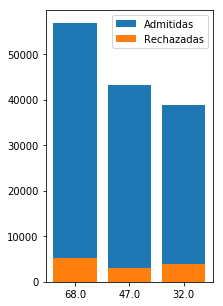

In [32]:
plt.figure(figsize=(3,5))
plt.bar(top3_analizadores.index, top3_analizadores['DOSIS_ADMITIDAS'], label = 'Admitidas')
plt.bar(top3_analizadores.index, top3_analizadores['DOSIS_RECHAZADAS'], label = 'Rechazadas')
plt.xticks(top3_analizadores.index, top3_analizadores['ANALIZADOR'])

plt.legend();

In [33]:
resto_analizadores = df_analizadores[3:14]

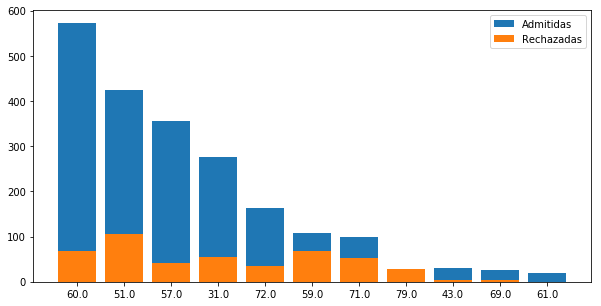

In [34]:
plt.figure(figsize=(10,5))
plt.bar(resto_analizadores.index, resto_analizadores['DOSIS_ADMITIDAS'], label = 'Admitidas')
plt.bar(resto_analizadores.index, resto_analizadores['DOSIS_RECHAZADAS'], label = 'Rechazadas')
plt.xticks(resto_analizadores.index, resto_analizadores['ANALIZADOR'])
plt.legend();

**El resto de analizadores (78, 38, 73, 55, 62, 81, 56, 58) no han realizado análisis suficientes como para tenerlos en cuenta en el estudio**

**Se pide hacer un estudio de las dosis rechazadas según formas anormales, para lo cual se ha elaborado el % que suponen las formas anormales en el total de los rechazos (%FORMAS_ANORMALES)** 

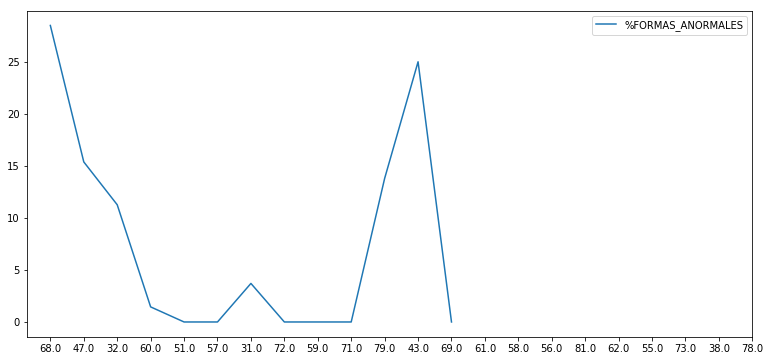

In [35]:
plt.figure(figsize=(13,6))
plt.plot(df_analizadores.index, df_analizadores['%FORMAS_ANORMALES'])
plt.xticks(df_analizadores.index, df_analizadores['ANALIZADOR'])
plt.legend();

**La grafica anterior no tiene en cuenta el número de dosis rechazadas. El analizador 68 posee cerca de un 30% de formas anormales detectadas en más de 5000 dosis rechazadas, mientras que el analizador 43 posee más o menos el mismo porcentaje con solo 4 dosis rechazadas**

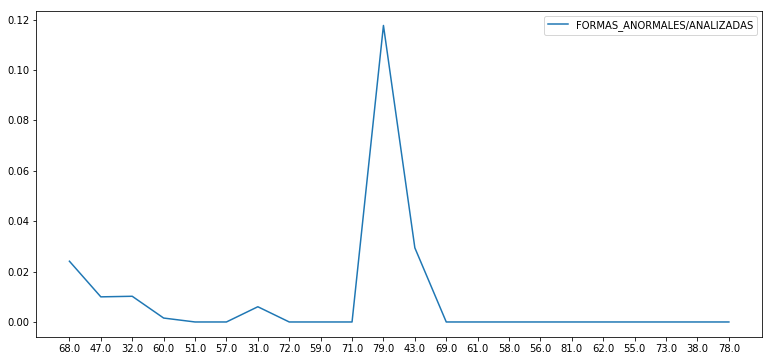

In [36]:
plt.figure(figsize=(13,6))
plt.plot(df_analizadores.index, df_analizadores['FORMAS_ANORMALES/ANALIZADAS'])
plt.xticks(df_analizadores.index, df_analizadores['ANALIZADOR'])
plt.legend();

**Los resultados muestran un par de cosas a destacar:**

**- Los últimos 7 analizadores no han detectado ninguna forma anormal en sus análisis.**

**- Se puede apreciar varios valores de formas anormales en varios analizadores: 79, 43, 68**

**A continuación se recoge la información de dichos analizadores.**

In [37]:
df.groupby(['ANALIZADOR', 'CENTRO'])['ANALIZADOR'].count()

ANALIZADOR  CENTRO
31          CAL         331
32          CAL       29031
            PEÑAS     12734
            TOL         890
38          CAL           1
43          CAL          25
            PEÑAS         8
            TOL           1
47          CAL       34671
            PEÑAS     10310
            TOL        1366
51          CAL         530
55          CAL           1
56          CAL           3
57          CAL         398
58          PEÑAS         7
59          CAL         176
60          CAL         642
61          CAL          16
            PEÑAS         4
62          CAL           1
68          CAL       34048
            PEÑAS     25736
            TOL        2350
69          CAL          12
            PEÑAS        18
71          CAL         103
            PEÑAS        49
72          CAL         136
            PEÑAS        53
            TOL          10
73          CAL           1
78          CAL           1
79          CAL          30
            PEÑAS         4
8

In [38]:
df['CENTRO'].unique()

array(['CAL', 'PEÑAS', 'TOL'], dtype=object)

**Según el segundo gráfico de barras apiladas, los analizadores 59 y 71 han destacado por el gran número de dosis rechazadas (59/176 y 52/152), siendo ambos del centro CAL.**

**Según el último gráfico de línea obtenido, los analizadores 79, 43, 68 han destacado por tener los números más elevados de rechazo por formas anormales entre todas sus dosis analizadas, perteneciendo los tres al centro CAL.**